In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib inline 

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "monospace" #sets the fonts to be used by the plots later on
plt.rcParams.update({'font.size': 18})

# Project Outline:

Ed Lorenz, a professor at MIT suggested that the nonlinearity of the equations of motion of Fluid Dynamics conveys a strong dependence to initial conditions. Such dependence produces substantially different long term forecasts for close initial conditions, limiting the time span where numerical weather predictions are reliable. Lorenz suggested a simplified model to illustrate the sensitivity to initial conditions. The system consists of a 2D fluid where different temperatures are kept fixed in the bottom (higher T) and upper (lower T) layers. The vertical temperature gradient drives the convection currents once the hotter fluid tends to rise, and such convection currents modify the temperatures in the fluid. See Fig. 1. Lorenz devised a highly simplified set of differential equations to model this system [3]

We reduce this system to 3 non linear differential equations: 

$$\frac{dC(t)}{dt}=\sigma \left[C(t)-L(t) \right]$$
$$\frac{dL(t)}{dt}=rC(t)-L(t)-C(t)M(t)$$
$$\frac{dM(t)}{dt}=C(t)L(t)-bM(t)$$

where $\sigma$, r, and b are all constants. 

In [2]:
def lorenz(c, l, m, s=10, r=28, b=8/3): 
    
    '''This function returns the time derivatives of the three variable C(t), L(t), M(t) by filling in the 
    values of the variables in the 3 differential equations.
    
    The output is simply a numerical value for each time derivative'''
    
    dcdt = s*(l - c)
    dldt = r*c - l - c*m
    dmdt = c*l - b*m
    return dcdt, dldt, dmdt

# Euler Method

Due to the fact that computers can not analytically solve differential equations, here we will make use of the Euler Method to solve this system of linear equations numerically.

The Euler method is used to solve differential equations of the type: 

$$\frac{dy}{dt}=f(t)$$

which as we can see matches the form of the above Lorenz equations.

The method makes use of the fact that 


$$\frac{dy}{dt}=\frac{\Delta y}{\Delta t}=\frac{y(t+\Delta t)-y(t)}{\Delta t}=f(t)$$

Rearranging this equation we find that 

$$y(t + \Delta t)=y(t)+f(t)\Delta t$$


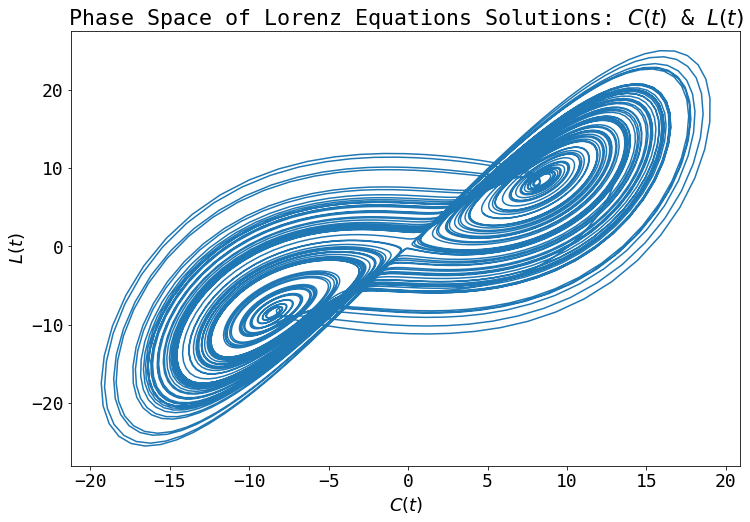

In [3]:
def euler(t,x,f,dt):
    
    ''' Here we define the euler method. Despite looking relatively simple the input x will be an array of the three 
    independent variables and thus will compute all three at once.'''
    
    s=x+f(t,x)*dt
    return(s)




dt = float(0.01) #time steps to be used, any larger causes the function to break down 
it = int(10000) #the function will run 10000 times which when multiplied by dt will give t_f=100

t=np.linspace(0,it*dt,it)



cs=np.empty(it) #create empty arrays for each variable. These will have values assigned to them 
ls=np.empty(it)
ms=np.empty(it)
#cs[0], ls[0], ms[0] = (13.0,8.1,45.0)


s=10
r=28
b=8/3

def lorenz(t,X):
    
    '''This function returns the time derivatives of the three variable C(t), L(t), M(t) by filling in the 
    values of the variables in the 3 differential equations.
    
    The output is simply a numerical value for each time derivative'''
    
    c=X[0]
    l=X[1]
    m=X[2]
    c_dot = s*(l - c)
    l_dot = r*c - l - c*m
    m_dot = c*l - b*m
    return np.array([c_dot, l_dot, m_dot])

X =np.array([13.0, 8.1, 45.0]) #specify our initial conditions ([C(0),L(0),M(0)])

for i in range(it):
    
    '''Here we take the components of the array modified by the functions and assign its contents to the various
    lists of variables'''
    
    cs[i] = X[0]
    ls[i] = X[1]
    ms[i] = X[2]
    # update the vector X to the next time step
    X = euler(i*dt, X, lorenz, dt)


#plot system     
plt.figure(figsize=(12,8))

plt.plot(cs,ls,'-')
plt.title("Phase Space of Lorenz Equations Solutions: $C(t)$ & $L(t)$")
plt.xlabel("$C(t)$")
plt.ylabel("$L(t)$")
plt.savefig('euler_cl.png')

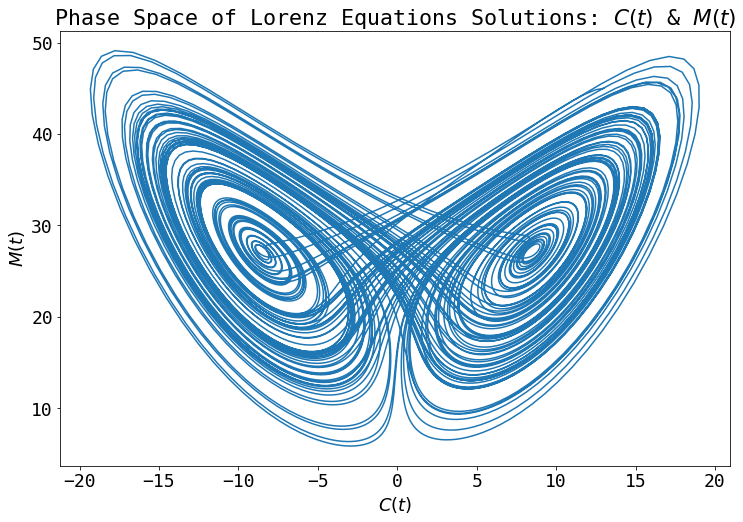

In [4]:
plt.figure(figsize=(12,8))
plt.plot(cs,ms,'-')
plt.title("Phase Space of Lorenz Equations Solutions: $C(t)$ & $M(t)$")
plt.xlabel("$C(t)$")
plt.ylabel("$M(t)$")
plt.savefig('euler_cm.png')

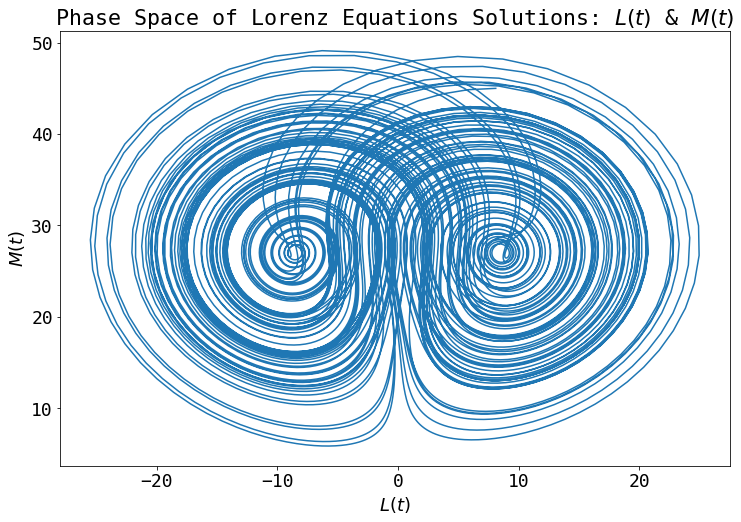

In [5]:
plt.figure(figsize=(12,8))
plt.plot(ls,ms,'-')
plt.title("Phase Space of Lorenz Equations Solutions: $L(t)$ & $M(t)$")
plt.xlabel("$L(t)$")
plt.ylabel("$M(t)$")
plt.savefig('euler_lm.png')

The next plot dispays the dependence of each variable on time. The legend denotes each variable. We can see that each variable oscillates wildly and erratically over time, bouncing back and forth crossing a central point 

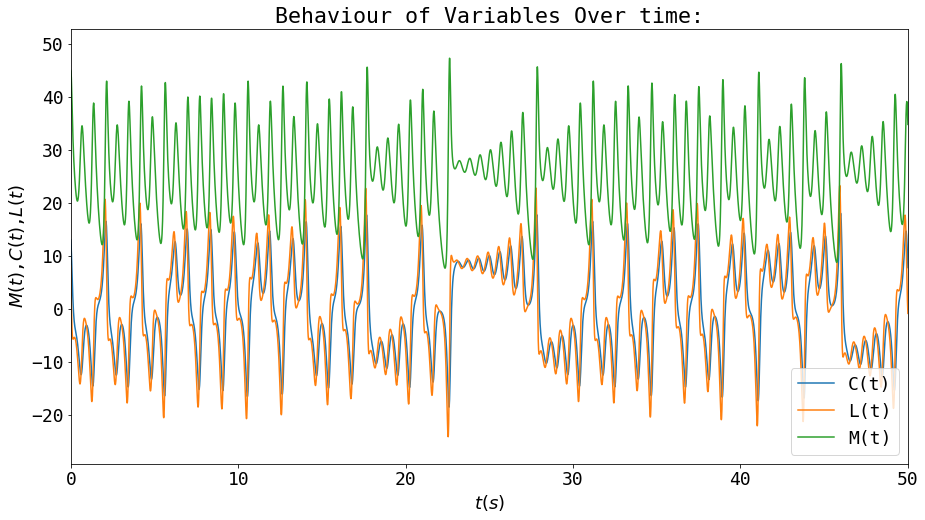

In [6]:
plt.figure(figsize=(15,8))
plt.plot(t,cs,'-',label="C(t)")
plt.plot(t,ls,'-',label="L(t)")
plt.plot(t,ms,'-',label="M(t)")
plt.title("Behaviour of Variables Over time:")
plt.xlim(0,50)
plt.xlabel("$t(s)$")
plt.ylabel("$M(t)$,$C(t)$,$L(t)$")
plt.legend(loc='lower right')
plt.savefig('euler_time.png')

Finally we have the "True" phase space or the 3D phase space for the system. This is the 3 variables plotted against one another. We see the distinctive butterfly shape with the two favoured regions (or wings) 

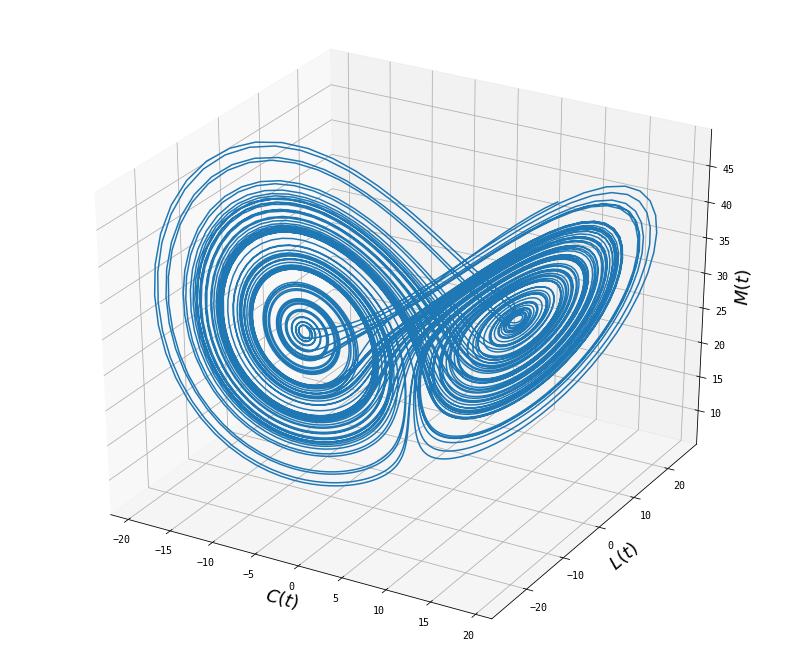

In [7]:
fig = plt.figure(figsize=(14,12))

ax = fig.add_subplot(111, projection='3d')
ax.plot(cs, ls, ms)
ax.zaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_xlabel('$C(t)$')
ax.set_ylabel('$L(t)$')
ax.set_zlabel('$M(t)$')
plt.savefig('euler_3d.png')

# Changing the initial parameters

Chaotic motion is defined as motion that is extremely sensitive to initial conditions. In this portion we will compare the solutions using the Euler Method but by slighty varying the intial parameters 

$$M(0)=45.0 \Rightarrow M(0)=44.5$$

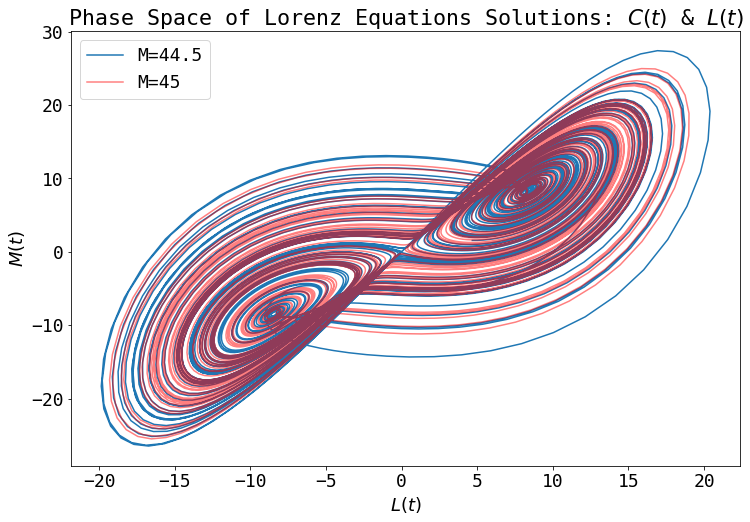

In [8]:
cs1=np.empty(it) #create empty arrays for each variable. These will have values assigned to them 
ls1=np.empty(it)
ms1=np.empty(it)


X_new =np.array([13.0, 8.1, 44.5]) #specify our NEW initial conditions ([C(0),L(0),M(0)=44.5])

for i in range(it):
    
    '''Here we take the components of the array modified by the functions and assign its contents to the various
    lists of variables'''
    
    cs1[i] = X_new[0]
    ls1[i] = X_new[1]
    ms1[i] = X_new[2]
    # update the vector X to the next time step
    X_new = euler(i*dt, X_new, lorenz, dt)


plt.figure(figsize=(12,8))
plt.plot(cs1,ls1,'-',label='M=44.5')
plt.plot(cs,ls,'r-',alpha=0.5,label='M=45')
plt.title("Phase Space of Lorenz Equations Solutions: $C(t)$ & $L(t)$")
plt.xlabel("$L(t)$")
plt.ylabel("$M(t)$")
plt.legend(loc='best')

As we can see in the above image the results are quite different for both plots despite only $\textbf{ONE}$ of the intial conditions varying by 0.5. 

This is a fantastic example of what Ed Lorenz saw for himself when he first observed chaotic behaviour after running a calculation from an initial point that had been rounded to few decimal places. The resultant behaviour varied hugely. 

Below is a plot of $C_0(t)$ divided by $C_1$ over time where $C_0$ is the initial run and $C_1$ is the run where $M(0)=44.5$.

Clearly despite regions where the two results are slightly similar the results split and become completely different after $\approx 10$ steps

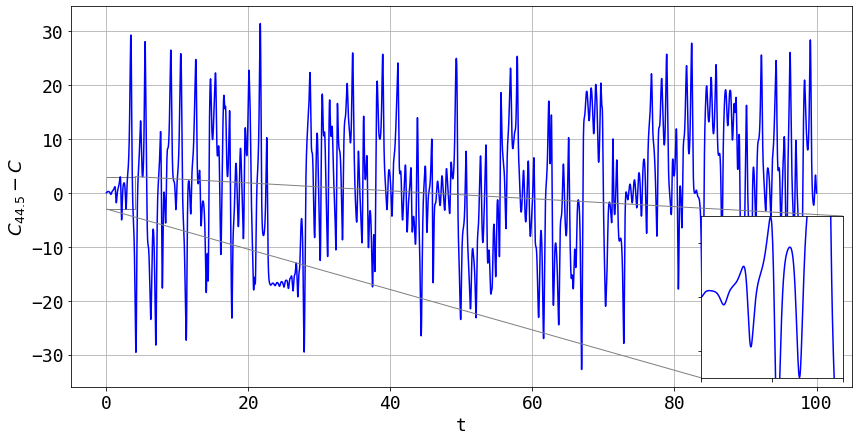

In [33]:
#plt.figure(figsize=(12,5))
#plt.plot(t,(cs1/cs),'b-')
##plt.ylim(-75,75)
#plt.xlabel("t")
##plt.ylabel('')
#


fig = plt.figure(figsize=(14,7))
ax = plt.axes()
ax.plot(t,cs1-cs,'b-')

plt.grid(True)

# Label the axis
ax.set_ylabel(r'$C_{44.5}-C$')
ax.set_xlabel(r't')


x1 = 0 #select x-range for zoomed region
x2 = 4


y1 = -3  #select y-range for zoomed region
y2 = 3

# Make the zoom-in plot
axins = zoomed_inset_axes(ax, 5, loc=4) # zoom = 2
axins.plot(t,cs1-cs,'b-')

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.savefig(r'differ.png')
plt.draw()
plt.show()

In [10]:
print(cs1/cs)

[1.         1.         1.00054899 ... 1.09403024 1.03840377 0.98266131]


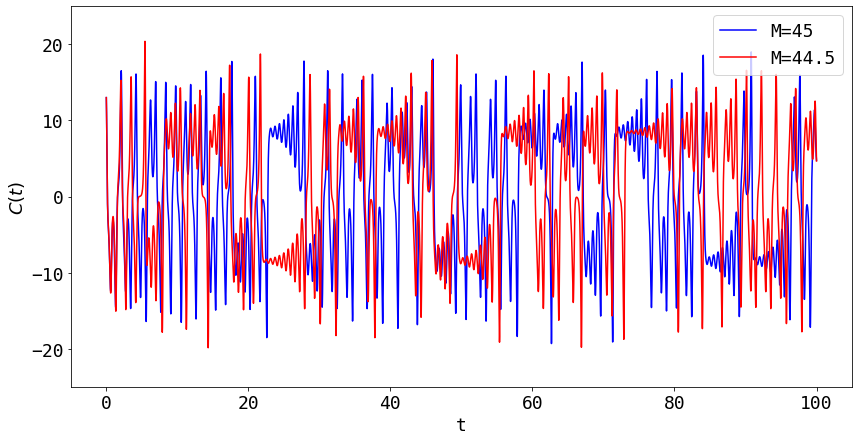

In [29]:
plt.figure(figsize=(14,7))
plt.plot(t,cs,'b-',label='M=45')
plt.plot(t,cs1,'r-',label='M=44.5')
plt.ylim(-25,25)
plt.xlabel("t")
plt.ylabel("$C(t)$")
plt.legend(loc='best')
plt.savefig(r'differ_euler.png')

Below is the two phase plots overlayed on one another in 3d. This is more for completeness than anything but it does highlight that this deviation occurs in 3 dimensions for each variable. 

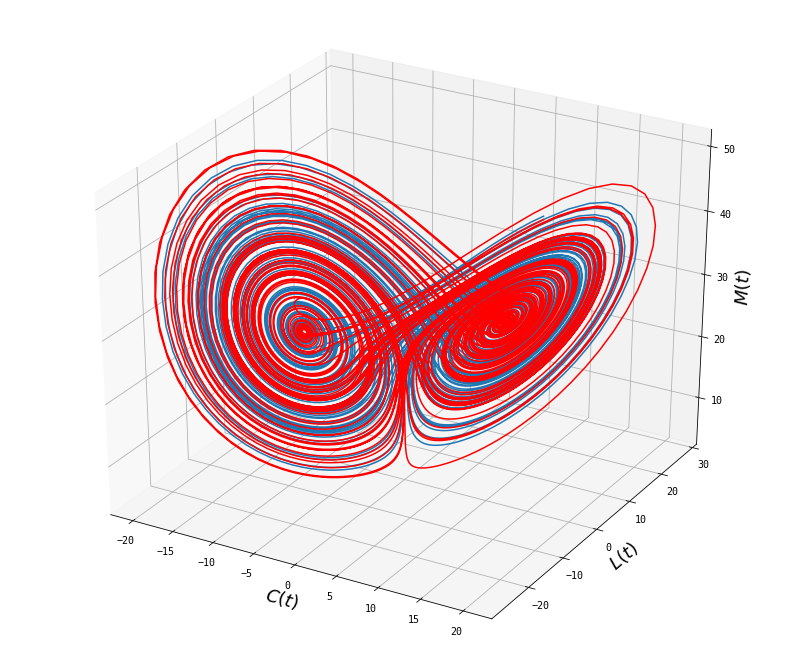

In [32]:
fig = plt.figure(figsize=(14,12))

ax = fig.add_subplot(111, projection='3d')
ax.plot(cs, ls, ms,alpha=1)
ax.plot(cs1, ls1, ms1,'r-')
ax.zaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_xlabel('$C(t)$')
ax.set_ylabel('$L(t)$')
ax.set_zlabel('$M(t)$')
plt.savefig('eulerdiffer_3d.png')

# The Runge-Kutta 4 Method

We can solve these equations using a different computational method, the RK4 method. 

Again similar to the Euler method this works for differential equations of the form: 

$$\frac{dy}{dt}=f(t,y)$$

The values of y(t) can be determined using the following algorithm 

$$y_{i+1} = y_n + \frac{1}{6} \left(k_1 + 2k_2 + 2k_3 + k_4 \right)$$





$$ k_1 =  f(t, y)\Delta t $$ 
$$ k_2 =  f\left(t + \frac{\Delta t}{2}, y + \frac{k_1}{2}\right)\Delta t $$
$$ k_3 =  f\left(t + \frac{\Delta t}{2}, y + \frac{k_2}{2}\right)\Delta t $$
$$ k_4 =  f\left(t + \Delta t, y +  k_3\right)\Delta t $$

In [13]:
#rk4 function
def rk4(t,x,f,dt):
    
    '''Here the function calculates'''
    
    k1=f(t,x)*dt
    k2=f(t+0.5*dt,x+0.5*k1)*dt
    k3=f(t+0.5*dt,x+0.5*k2)*dt
    k4=f(t+0.5*dt,x+k3)*dt
    s=x+k1/6.0+k2/3.0+k3/3.0+k4/6.0
    
    return(s)




dt = float(0.01) #time steps to be used 
it = int(10000)
#t=np.linspace(0,dt*(it+1),it+1)




cs_rk=np.empty(it)
ls_rk=np.empty(it)
ms_rk=np.empty(it)
#cs_rk[0], ls_rk[0], ms_rk[0] = (13.0,8.1,45.0)

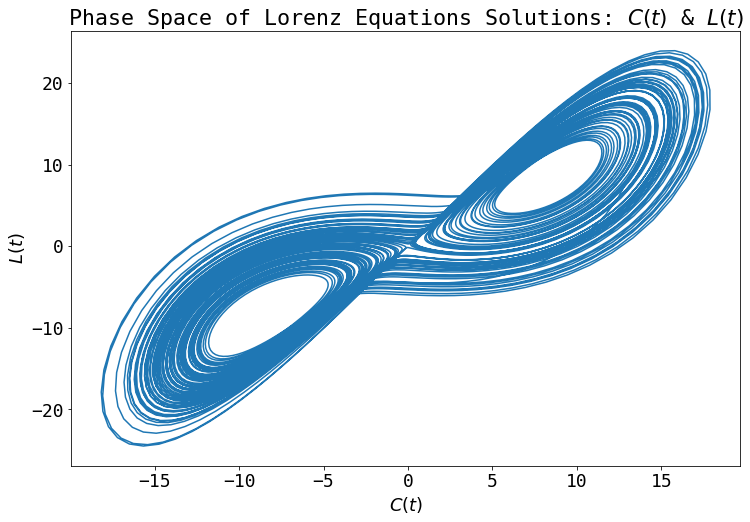

In [38]:
s=10
r=28
b=8/3

def lorenz(t,X):
    
    '''This function returns the time derivatives of the three variable C(t), L(t), M(t) by filling in the 
    values of the variables in the 3 differential equations.
    
    The output is simply a numerical value for each time derivative'''
    
    c=X[0]
    l=X[1]
    m=X[2]
    c_dot = s*(l - c)
    l_dot = r*c - l - c*m
    m_dot = c*l - b*m
    return np.array([c_dot, l_dot, m_dot])

X_rk =np.array([13.0, 8.1, 45.0])
for i in range(it):
    
    '''Here we take the components of the array modified by the functions and assign its contents to the various
    lists of variables'''
    
    cs_rk[i] = X_rk[0]
    ls_rk[i] = X_rk[1]
    ms_rk[i] = X_rk[2]
    # update the vector X to the next time step
    X_rk = rk4(i*dt, X_rk, lorenz, dt)
    


plt.figure(figsize=(12,8))
plt.plot(cs_rk,ls_rk,'-')
plt.title("Phase Space of Lorenz Equations Solutions: $C(t)$ & $L(t)$")
plt.xlabel("$C(t)$")
plt.ylabel("$L(t)$")
plt.savefig(r'rk4_cl.png')

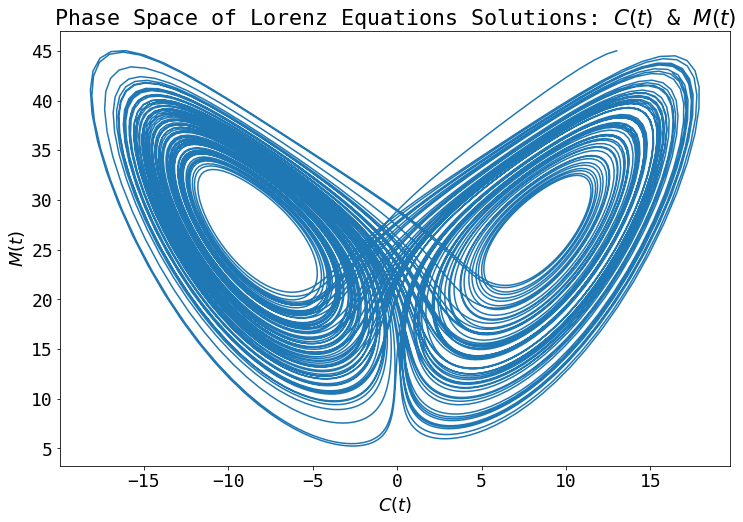

In [40]:
plt.figure(figsize=(12,8))
plt.plot(cs_rk,ms_rk,'-')
plt.title("Phase Space of Lorenz Equations Solutions: $C(t)$ & $M(t)$")
plt.xlabel("$C(t)$")
plt.ylabel("$M(t)$")
plt.savefig(r'rk4_cm.png')

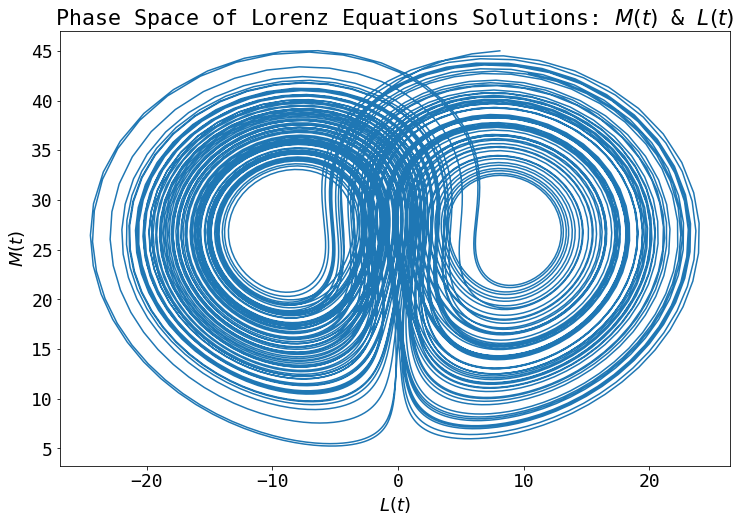

In [41]:
plt.figure(figsize=(12,8))
plt.plot(ls_rk,ms_rk,'-')
plt.title("Phase Space of Lorenz Equations Solutions: $M(t)$ & $L(t)$")
plt.xlabel("$L(t)$")
plt.ylabel("$M(t)$")
plt.savefig(r'rk4_lm.png')

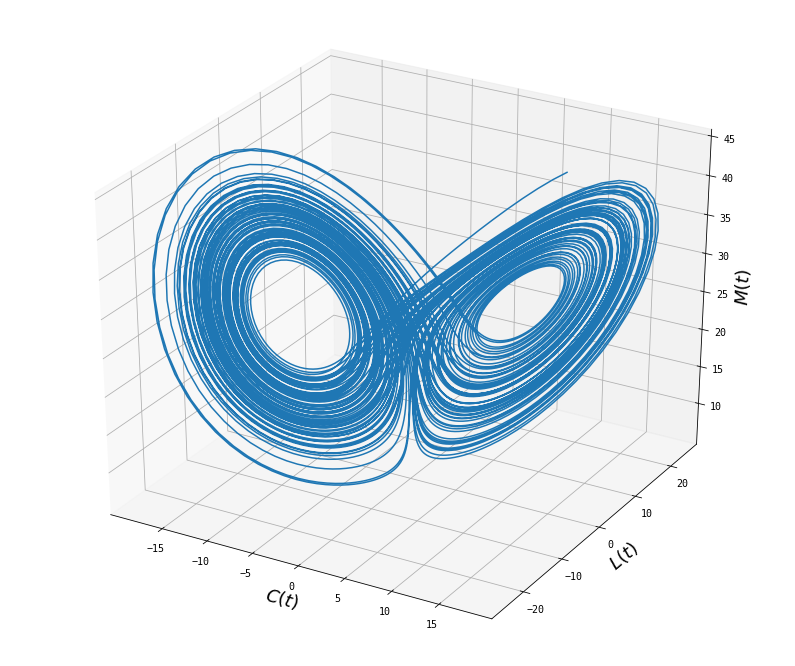

In [34]:
fig = plt.figure(figsize=(14,12))

ax = fig.add_subplot(111, projection='3d')
ax.plot(cs_rk, ls_rk, ms_rk)
ax.zaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_xlabel('$C(t)$')
ax.set_ylabel('$L(t)$')
ax.set_zlabel('$M(t)$')
plt.savefig(r'RK4.png')


# Comparing RK4 and Euler


We can perform a comparison of the two methods. The differences are almost immediately apparent with the RK4 method resulting in neater, more compact orbits and clearly defined central regions where no activity is present. These central abscesses are not present in the Euler method. The different accuracies of the methods are also clear with the two diverging from one another after only one step. 

The reason for these differences are due to the approximations made by the computational methods. The Euler method uses different methods of calculation meaning the result will be different at each step, becoming more and more different at each point. 

If this was a non chaotic system we would see slightly different results anyway but because the Lorenz system is sensitive to initial conditions we see wildly different solutions as a result. 

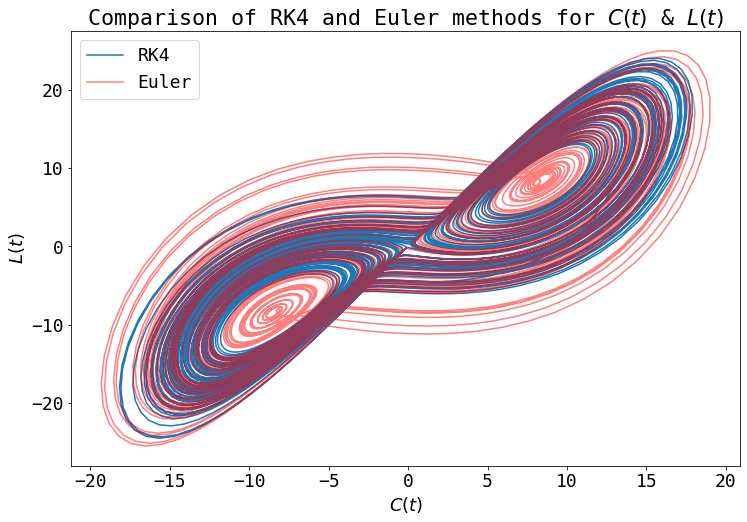

In [18]:
plt.figure(figsize=(12,8))
plt.plot(cs_rk,ls_rk,'-',label='RK4')
plt.plot(cs,ls,'r-',alpha=0.5,label='Euler')
plt.title("Comparison of RK4 and Euler methods for $C(t)$ & $L(t)$")
plt.xlabel("$C(t)$")
plt.ylabel("$L(t)$")
plt.legend(loc='best')
plt.savefig(r'euler_rk4.png')

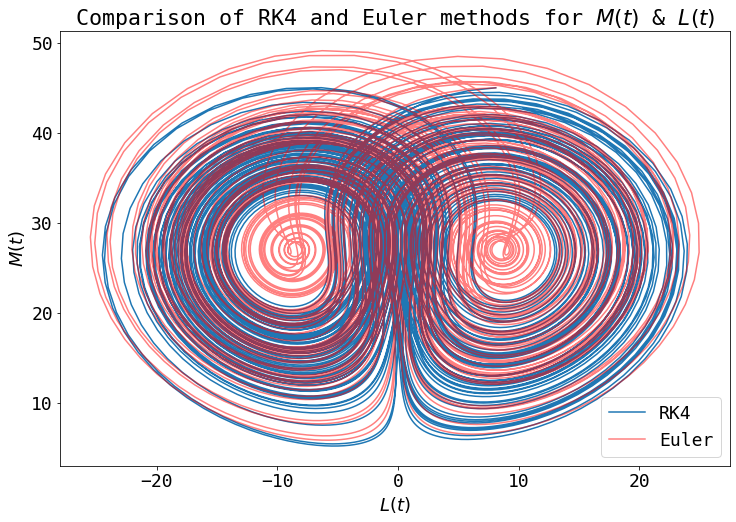

In [36]:
plt.figure(figsize=(12,8))
plt.plot(ls_rk,ms_rk,'-',label='RK4')
plt.plot(ls,ms,'r-',alpha=0.5,label='Euler')
plt.title("Comparison of RK4 and Euler methods for $M(t)$ & $L(t)$")
plt.xlabel("$L(t)$")
plt.ylabel("$M(t)$")
plt.legend(loc='best')
plt.

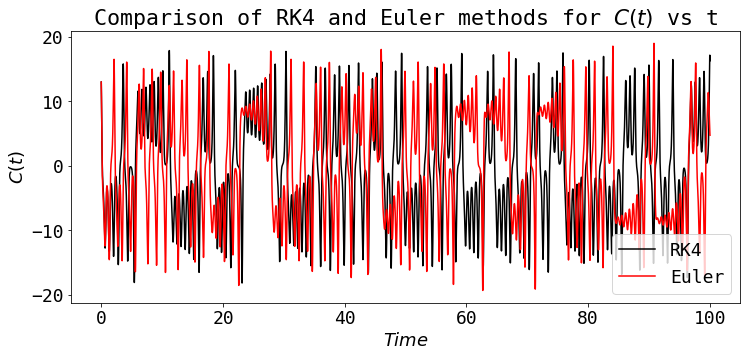

In [54]:
#comparison of C(t) and C(t)-RK4

plt.figure(figsize=(12,5))
plt.plot(t,cs_rk,'k-',label='RK4')
plt.plot(t,cs,'r-',alpha=1,label='Euler')
plt.title("Comparison of RK4 and Euler methods for $C(t)$ vs t")
plt.xlabel("$Time$")
plt.ylabel("$C(t)$")
plt.legend(loc='best')
plt.savefig(r'euler_rk4c.png')

In [37]:
print(cs/cs_rk)

[1.         1.00682462 1.0117238  ... 0.28862747 0.28747183 0.29134679]


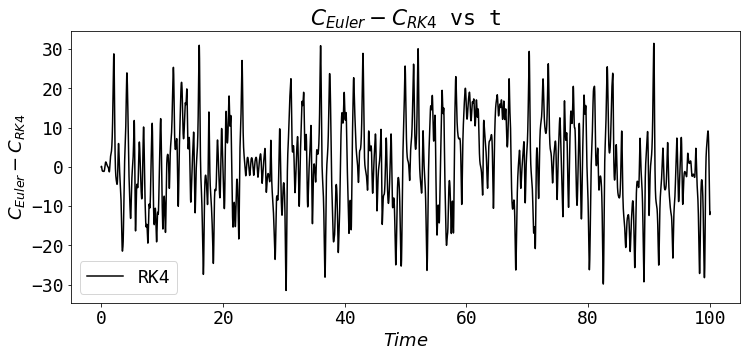

In [20]:
#comparison of C(t) and C(t)-RK4

plt.figure(figsize=(12,5))
plt.plot(t,cs-cs_rk,'k-',label='RK4')

plt.title(r"$C_{Euler}-C_{RK4}$ vs t")
plt.xlabel("$Time$")
plt.ylabel(r"$C_{Euler}-C_{RK4}$")
plt.legend(loc='best')

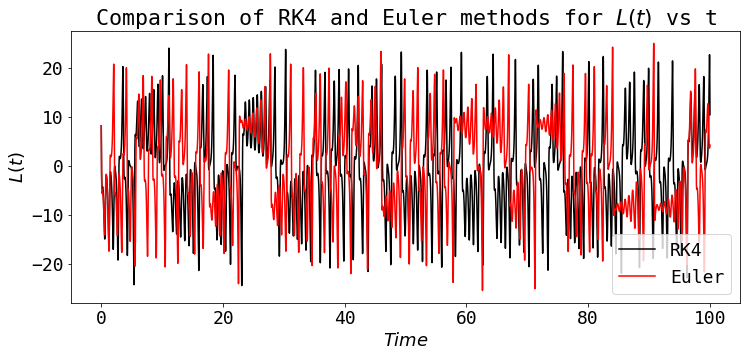

In [55]:
plt.figure(figsize=(12,5))
plt.plot(t,ls_rk,'k-',label='RK4')
plt.plot(t,ls,'r-',alpha=1,label='Euler')
plt.title("Comparison of RK4 and Euler methods for $L(t)$ vs t")
plt.xlabel("$Time$")
plt.ylabel("$L(t)$")
plt.legend(loc='best')
plt.savefig(r'euler_rk4l.png')

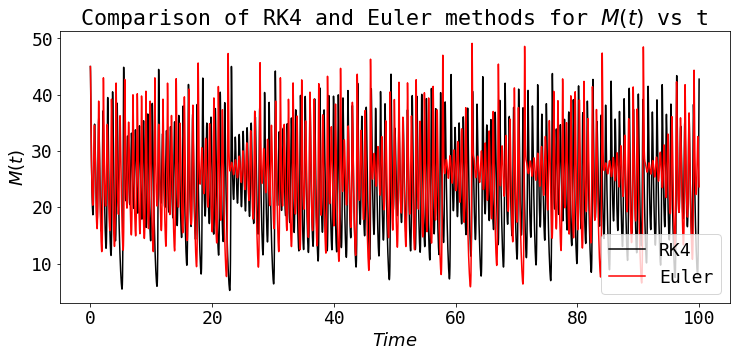

In [59]:
#comparison of M(t) and M(t)-RK4

plt.figure(figsize=(12,5))
plt.plot(t,ms_rk,'k-',label='RK4')
plt.plot(t,ms,'r-',alpha=1,label='Euler')
plt.title("Comparison of RK4 and Euler methods for $M(t)$ vs t")
plt.xlabel("$Time$")
plt.ylabel("$M(t)$")
plt.legend(loc='lower right')
plt.savefig(r'euler_rk4m.png')

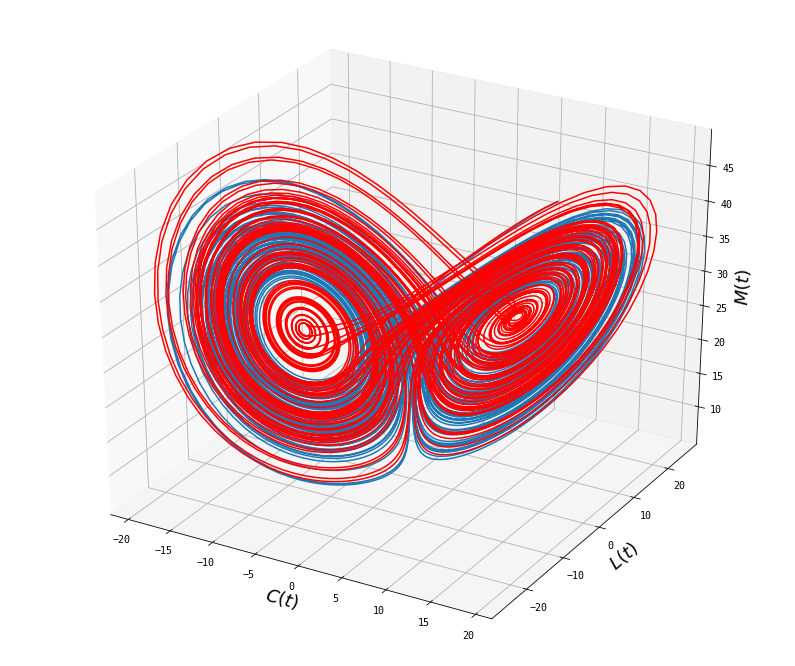

In [57]:
fig = plt.figure(figsize=(14,12))

ax = fig.add_subplot(111, projection='3d')
ax.plot(cs_rk, ls_rk, ms_rk)
ax.plot(cs, ls, ms,'r-')
ax.zaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_xlabel('$C(t)$')
ax.set_ylabel('$L(t)$')
ax.set_zlabel('$M(t)$')
plt.savefig(r'RK4vsEuler.png')

# Checking a number of intial conditions

Here we will check and solve the Lorenz equations (using RK4) for a range of initial conditions, all of them only a small deviation for the first value: $M(0)=45$

$$M(0)=44.5$$
$$M(0)=44.75$$
$$M(0)=44.85$$
$$M(0)=44.95$$


Having already tried this earlier for the euler method the expected result should be the same, deviation from the original solutions. 

In [23]:
X_rk1 =np.array([13.0, 8.1, 44.5]) #here we set up arrays for each intital condition 
X_rk2 =np.array([13.0, 8.1, 44.75])
X_rk3 =np.array([13.0, 8.1, 44.85])
X_rk4 =np.array([13.0, 8.1, 44.95])


cs_rk1=np.empty(it) #create empty arrays for each variable. These will have values assigned to them 
ls_rk1=np.empty(it)
ms_rk1=np.empty(it)

cs_rk2=np.empty(it)  
ls_rk2=np.empty(it)
ms_rk2=np.empty(it)

cs_rk3=np.empty(it)  
ls_rk3=np.empty(it)
ms_rk3=np.empty(it)

cs_rk4=np.empty(it)  
ls_rk4=np.empty(it)
ms_rk4=np.empty(it)


#M(0)=44.5
for i in range(it):
       
    cs_rk1[i] = X_rk1[0]
    ls_rk1[i] = X_rk1[1]
    ms_rk1[i] = X_rk1[2]
    # update the vector X to the next time step
    X_rk1 = rk4(i*dt, X_rk1, lorenz, dt)

    
#M(0)=44.75    
for i in range(it):
    
        
    cs_rk2[i] = X_rk2[0]
    ls_rk2[i] = X_rk2[1]
    ms_rk2[i] = X_rk2[2]
    # update the vector X to the next time step
    X_rk2 = rk4(i*dt, X_rk2, lorenz, dt)

#M(0)=44.85
for i in range(it):
       
    cs_rk3[i] = X_rk3[0]
    ls_rk3[i] = X_rk3[1]
    ms_rk3[i] = X_rk3[2]
    # update the vector X to the next time step
    X_rk3 = rk4(i*dt, X_rk3, lorenz, dt)
    
#M(0)=44.95    
for i in range(it):
    
    cs_rk4[i] = X_rk4[0]
    ls_rk4[i] = X_rk4[1]
    ms_rk4[i] = X_rk4[2]
    # update the vector X to the next time step
    X_rk4 = rk4(i*dt, X_rk4, lorenz, dt)
    
    
    

The best way to show that the different inital conditions give different is to plot them against one another. Although each plot looks quite similar there is a clear difference between each phase diagram and the original phase diagram ($M(0)=45$)

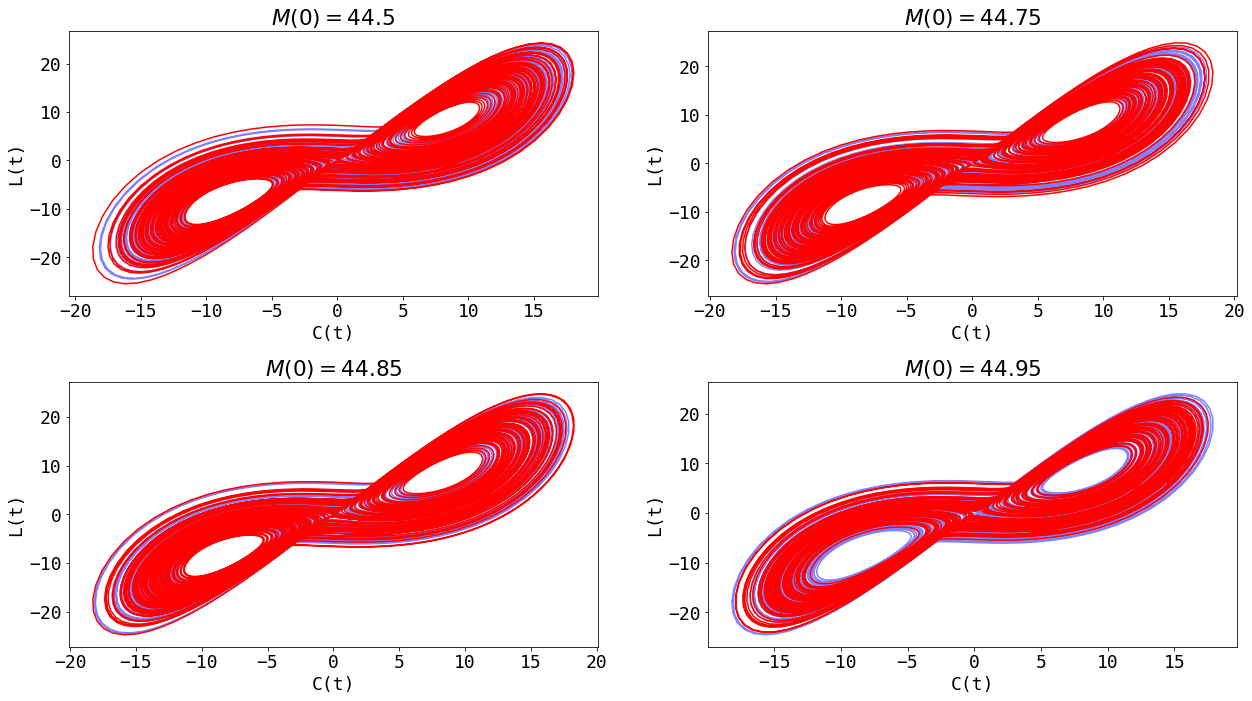

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=2)




fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=3.0)


ax[0,0].plot(cs_rk,ls_rk,'b-',alpha=0.5)
ax[0,1].plot(cs_rk,ls_rk,'b-',alpha=0.5)
ax[1,0].plot(cs_rk,ls_rk,'b-',alpha=0.5)
ax[1,1].plot(cs_rk,ls_rk,'b-',alpha=0.5)
ax[0,0].plot(cs_rk1,ls_rk1,'r-')
ax[0,1].plot(cs_rk2,ls_rk2,'r-')
ax[1,0].plot(cs_rk3,ls_rk3,'r-')
ax[1,1].plot(cs_rk4,ls_rk4,'r-')

#plt.grid(True)

ax[0,0].set_ylabel('L(t)')
ax[0,1].set_ylabel('L(t)')
ax[1,0].set_ylabel('L(t)')
ax[1,1].set_ylabel('L(t)')


ax[0,0].set_xlabel('C(t)')
ax[0,1].set_xlabel('C(t)')
ax[1,0].set_xlabel('C(t)')
ax[1,1].set_xlabel('C(t)')


ax[0,0].set_title(r'$M(0)=44.5$')
ax[0,1].set_title(r'$M(0)=44.75$')
ax[1,0].set_title(r'$M(0)=44.85$')
ax[1,1].set_title(r'$M(0)=44.95$')

plt.savefig(r'total_diff_rk.png')


Text(0.5, 1, '$M(0)=44.95$')

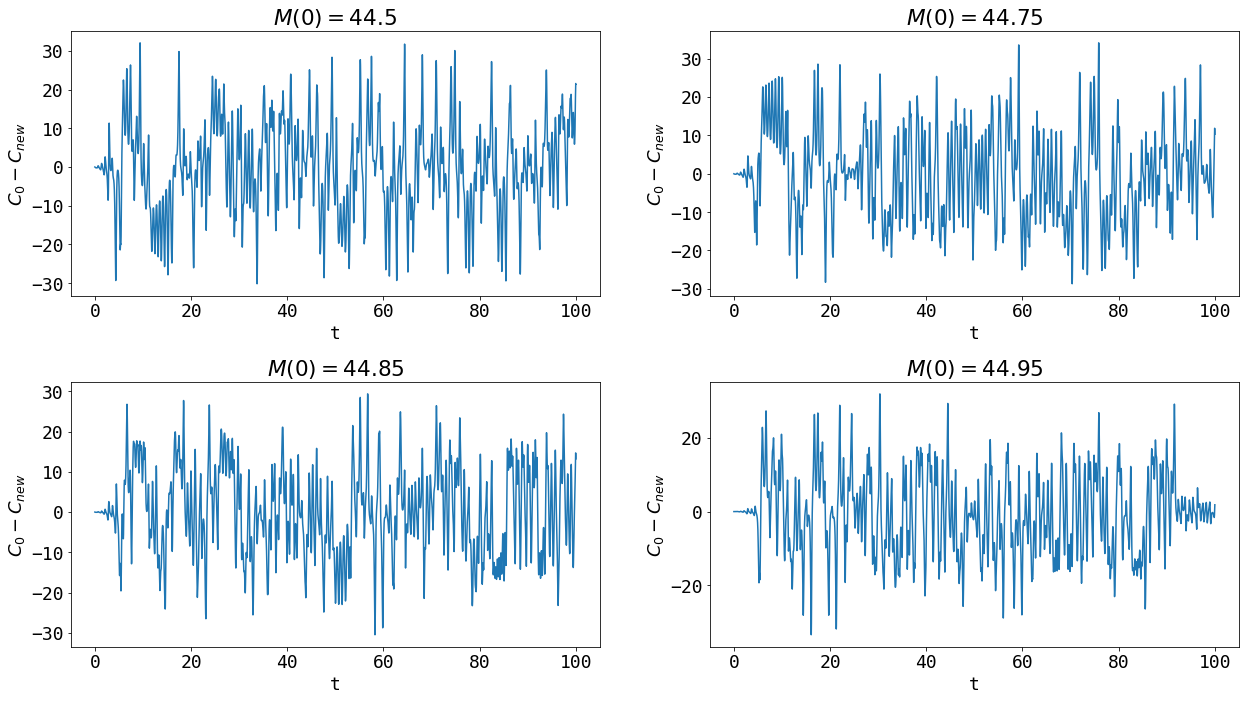

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=2)




fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=3.0)



ax[0,0].plot(t,cs_rk-cs_rk1)
ax[0,1].plot(t,cs_rk-cs_rk2)
ax[1,0].plot(t,cs_rk-cs_rk3)
ax[1,1].plot(t,cs_rk-cs_rk4)

#plt.grid(True)

ax[0,0].set_ylabel(r'$C_0-C_{new}$')
ax[0,1].set_ylabel(r'$C_0-C_{new}$')
ax[1,0].set_ylabel(r'$C_0-C_{new}$')
ax[1,1].set_ylabel(r'$C_0-C_{new}$')


ax[0,0].set_xlabel('t')
ax[0,1].set_xlabel('t')
ax[1,0].set_xlabel('t')
ax[1,1].set_xlabel('t')


ax[0,0].set_title(r'$M(0)=44.5$')
ax[0,1].set_title(r'$M(0)=44.75$')
ax[1,0].set_title(r'$M(0)=44.85$')
ax[1,1].set_title(r'$M(0)=44.95$')



We can see here even from a brief visual examination that the amounts by which $C(t)$ varies due to M changing is different and unique for each value of $M(0)$

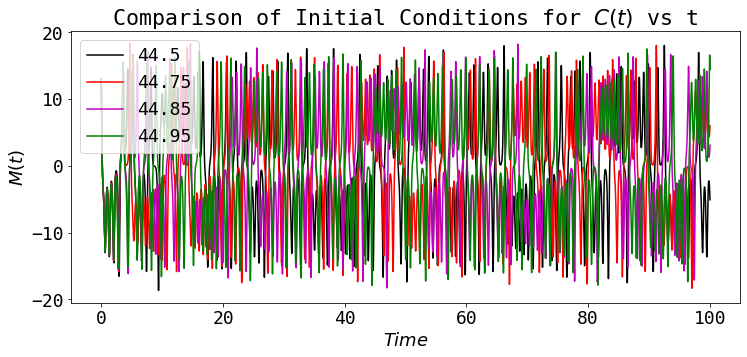

In [26]:
#comparison of M(t) and M(t)-RK4

plt.figure(figsize=(12,5))
plt.plot(t,cs_rk1,'k-',label='44.5')
plt.plot(t,cs_rk2,'r-',alpha=1,label='44.75')
plt.plot(t,cs_rk3,'m-',label='44.85')
plt.plot(t,cs_rk4,'g-',alpha=1,label='44.95')

plt.title("Comparison of Initial Conditions for $C(t)$ vs t")
plt.xlabel("$Time$")
plt.ylabel("$M(t)$")
plt.legend(loc='best')

Here the difference is plotted from the original for each value of $M(0)$. Again similar for the Euler method we see that for the first few points the the deviations are very small ($\sim0-0.001$) however the scale of the differences quickly blows up and after only a few steps we have vastly different solutions

[ 0.00000000e+00 -3.05423082e-03 -1.13989835e-02 ...  2.15357885e+01
  2.15494805e+01  2.13806876e+01]


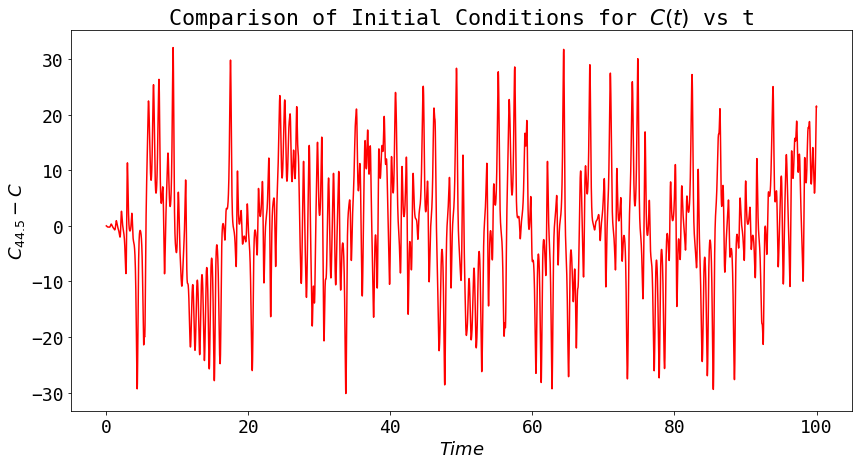

In [53]:
print(cs_rk-cs_rk1)

plt.figure(figsize=(14,7))
plt.plot(t,cs_rk-cs_rk1,'r-',label='44.5')
#plt.plot(t,cs_rk2,'r-',alpha=1,label='44.75')
#plt.plot(t,cs_rk3,'m-',label='44.85')
#plt.plot(t,cs_rk4,'g-',alpha=1,label='44.95')

plt.title("Comparison of Initial Conditions for $C(t)$ vs t")
plt.xlabel("$Time$")
plt.ylabel(r"$C_{44.5}-C$")
#plt.legend(loc='best')
plt.savefig(r'rk4_firstdiff.png')

[ 0.00000000e+00 -3.05411105e-04 -1.13973318e-03 ...  1.24602341e+00
  1.57657505e+00  1.85097229e+00]


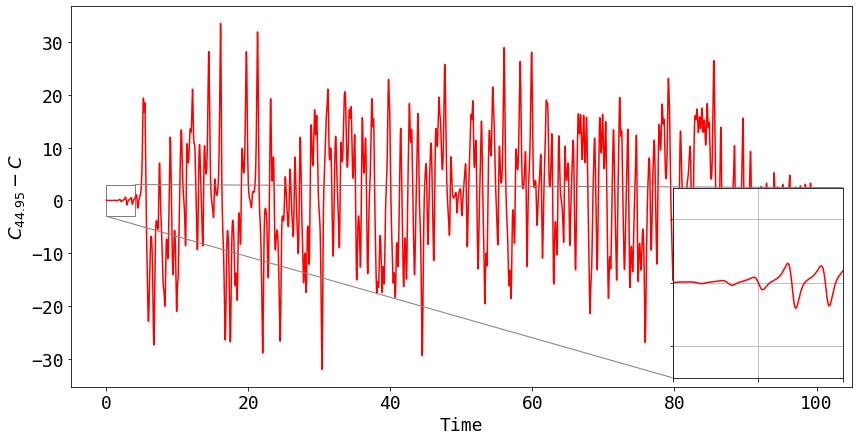

In [52]:
print(cs_rk-cs_rk4)

#plt.figure(figsize=(12,5))
#plt.plot(t,(cs1/cs),'b-')
##plt.ylim(-75,75)
#plt.xlabel("t")
##plt.ylabel('')
#


fig = plt.figure(figsize=(14,7))
ax = plt.axes()
ax.plot(t,cs_rk4-cs_rk,'r-')

#plt.grid(True)

# Label the axis
ax.set_ylabel(r'$C_{44.95}-C$')
ax.set_xlabel(r'Time')


x1 = 0 #select x-range for zoomed region
x2 = 4


y1 = -3  #select y-range for zoomed region
y2 = 3

# Make the zoom-in plot
axins = zoomed_inset_axes(ax, 6, loc=4) # zoom = 2
axins.plot(t,cs_rk4-cs_rk,'r-')
axins.grid(True)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.savefig(r'rk4_diffzoom.png')
plt.draw()
plt.show()

# Results of initial conditions

We see that the less the initial value changes from it's original value the less the other variables change for the first few steps. $\textbf{However}$ this is only delaying the inevitable as the system will always eventually deviate. The changes are initially smaller but the rate at which they begin to occur remains the same, changing after a single step (on an order of $\sim10^{-4}$)